In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso, RidgeCV, Ridge
import matplotlib.pyplot as plt

In [2]:
# Import the csv file
giturl = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
hitters = pd.read_csv(giturl)
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
# Clean the data a bit and pull out X and Y
data = hitters.select_dtypes([np.number]).dropna()
X = data.drop("Salary", axis=1)
y = data["Salary"]
alphas = np.logspace(-10, 9, 1000)

### Lasso

In [4]:
def lasso_regression(X, y, alphas, plot = False):

  weights = []
  
  # Run lasso regression for each value of alpha  
  for alpha in alphas:
    lasso = Lasso(alpha, normalize = True, max_iter=100000).fit(X, y)
    weights.append(lasso.coef_)
      
  if plot == True:
    # Plot alpha and weights
    plt.semilogx(alphas, weights)
    plt.xlabel('alpha')
    plt.ylabel('weight')
    plt.title('Lasso Coefficient Trajectories')



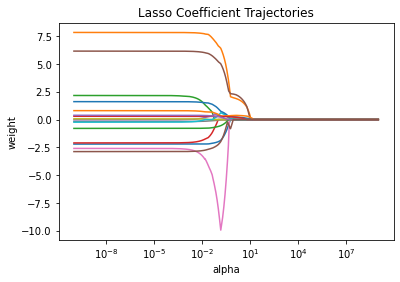

In [5]:
lasso_model = lasso_regression(X, y, alphas, plot = True)

In [6]:
# Print the coef for the first model
lasso_model = Lasso(alpha = 10, normalize = True, max_iter=100000).fit(X, y)
print(pd.Series(lasso_model.coef_, index = X.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


There are three left in the first model - Hits, CRuns, and CRBI

In [7]:
# Print the coef for the cv model
lasso_cv = LassoCV(normalize = True, cv = 5, max_iter = 10000, random_state = 4).fit(X, y)
print(pd.Series(lasso_cv.coef_, index = X.columns))
print(lasso_cv.alpha_)

AtBat     -1.895082
Hits       6.455555
HmRun     -0.000000
Runs      -0.000000
RBI        0.349806
Walks      5.053509
Years     -9.587424
CAtBat    -0.008710
CHits      0.000000
CHmRun     0.557524
CRuns      0.789045
CRBI       0.337133
CWalks    -0.564136
PutOuts    0.285458
Assists    0.225658
Errors    -2.039256
dtype: float64
0.13691039485958048


There are many more left in this model (13) and the optimal alpha is .14

### Ridge

In [8]:
def ridge_regression(X, y, alphas, plot = False):

  weights = []
  
  # Run lasso regression for each value of alpha  
  for alpha in alphas:
    ridge = Ridge(alpha, normalize = True, max_iter=100000).fit(X, y)
    weights.append(ridge.coef_)
      
  if plot == True:
    # Plot alpha and weights
    plt.semilogx(alphas, weights)
    plt.xlabel('alpha')
    plt.ylabel('weight')
    plt.title('Ridge Coefficient Trajectories')

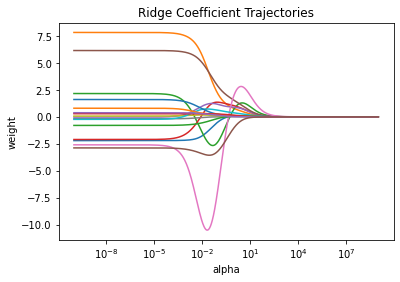

In [9]:
ridge_model = ridge_regression(X, y, alphas, plot = True)

In [10]:
# Print the coef for the first model
ridge_model = Ridge(alpha = 10, normalize = True, max_iter=100000).fit(X, y)
print(pd.Series(ridge_model.coef_, index = X.columns))

AtBat      0.069921
Hits       0.274156
HmRun      0.951045
Runs       0.449675
RBI        0.457258
Walks      0.572804
Years      1.998412
CAtBat     0.005877
CHits      0.022242
CHmRun     0.166005
CRuns      0.044649
CRBI       0.046078
CWalks     0.046315
PutOuts    0.035902
Assists    0.005472
Errors    -0.070350
dtype: float64


This model kept all of them in

In [15]:
# Print the coef for the cv model
ridge_cv = RidgeCV(alphas = alphas, normalize = True, cv = 5).fit(X, y)
print(pd.Series(ridge_cv.coef_, index = X.columns))
print(ridge_cv.alpha_)

AtBat      0.086306
Hits       0.807538
HmRun      0.613337
Runs       1.057258
RBI        0.903847
Walks      1.582974
Years      1.806087
CAtBat     0.011286
CHits      0.054525
CHmRun     0.379729
CRuns      0.109894
CRBI       0.113680
CWalks     0.063907
PutOuts    0.156612
Assists    0.027426
Errors    -1.104690
dtype: float64
0.8850074914473457


The cross validated model also kept all in and had an alpha of .89

## Bias-Varaiance Tradeoff

The bias varaince tradeoff is between alpha (the regularization penalty) which reduces bias and X which allows for varaince. When alpha is large it means that there is smaller bias but less X's survive meaning that we lose varaince (e.g. in the model with 9 weights > 0). When alpha is small we have more bias but we retain more X's (and/or their influence) meaning we have greater varaiance. 